# AirQualityPy

In [6]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import numpy as np
import json
from config1 import api_key

In [10]:
# Create the base url
url = "https://api.airvisual.com/v2/city?city="

# Create the city list for desired data
city = ["Raleigh", "Asheville", "Charlotte", "Wilmington", "New Bern", "Rocky Mount", "Fayetteville"] 

# Create an output list to hold request results
output = []

# Loop through the cities to perform requests
for c in city:
    query_url = url + c +"&state=North Carolina&country=USA&" + "&key=" + api_key  
    response = requests.get(query_url).json()
    
    # Put results to the output list
    output.append(response)

# Display the data
pprint(output)

[{'data': {'city': 'Raleigh',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 25,
                                     'aqius': 63,
                                     'maincn': 'p2',
                                     'mainus': 'p2',
                                     'ts': '2019-10-03T22:00:00.000Z'},
                       'weather': {'hu': 55,
                                   'ic': '01d',
                                   'pr': 1013,
                                   'tp': 33,
                                   'ts': '2019-10-03T22:00:00.000Z',
                                   'wd': 260,
                                   'ws': 2.38}},
           'location': {'coordinates': [-78.574203, 35.856098],
                        'type': 'Point'},
           'state': 'North Carolina'},
  'status': 'success'},
 {'data': {'city': 'Asheville',
           'country': 'USA',
           'current': {'pollution': {'aqicn': 19,
                                  

In [106]:
# Create lists to hold necessary data
city_name = []
state = []
country_name = []
air_quality = []
main_pollutant = []
humidity = []
pressure = []
temperature = []
wind_speed = []
date = []

# Select the variables and put them in relative lists
for i in range(len(output)):
    city_name.append(output[i]["data"]["city"])
    state.append(output[i]["data"]["state"])
    country_name.append(output[i]["data"]["country"])
    air_quality.append(output[i]["data"]["current"]["pollution"]["aqius"])
    humidity.append(output[i]["data"]["current"]["weather"]["hu"])
    pressure.append(output[i]["data"]["current"]["weather"]["pr"])
    temperature.append(output[i]["data"]["current"]["weather"]["tp"])
    wind_speed.append(output[i]["data"]["current"]["weather"]["ws"])
    date.append(output[i]["data"]["current"]["pollution"]["ts"])
    main_pollutant.append(output[i]["data"]["current"]["pollution"]["mainus"])

In [107]:
# Create the dictionary to hold data
air_data = {"City": city_name,
             "State": state,
             "Country": country_name,
             "Air Quality": air_quality,
             "Main Pollutant": main_pollutant,
             "Humidity": humidity,
             "Pressure": pressure,
             "Temperature": temperature,
             "Wind Speed": wind_speed,
             "Date": date
           }
# Convert dictionary to a dataframe
air_df = pd.DataFrame(air_data)
air_df

,City,State,Country,Air Quality,Main Pollutant,Humidity,Pressure,Temperature,Wind Speed,Date
0,Raleigh,North Carolina,USA,63,p2,55,1013,33,2.38,2019-10-03T22:00:00.000Z
1,Asheville,North Carolina,USA,53,p2,45,1021,28,2.10,2019-10-03T20:00:00.000Z
2,Charlotte,North Carolina,USA,63,p2,28,1015,34,1.50,2019-10-03T22:00:00.000Z
3,Wilmington,North Carolina,USA,82,p2,74,1014,29,3.10,2019-10-03T22:00:00.000Z
4,New Bern,North Carolina,USA,34,p2,66,1014,29,4.60,2019-10-03T21:00:00.000Z
5,Rocky Mount,North Carolina,USA,64,p2,41,1013,33,3.10,2019-10-03T21:00:00.000Z
6,Fayetteville,North Carolina,USA,50,p2,32,1014,34,3.10,2019-10-03T19:00:00.000Z


### Air Quality Index Status for NC cities

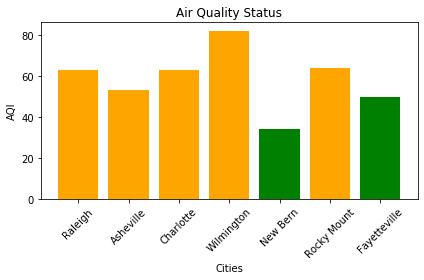

In [108]:
# Create a line chart to show air quality index change for each city
# Change the color depending on the air quality index
colors = ["green" if x <= 50 else "orange" if x <= 100 else "red" for x in air_df["Air Quality"]]
plt.bar(air_df["City"], air_df["Air Quality"], align="center", color = colors)

# Add labels 
plt.xticks(air_df["City"], rotation = 45)
plt.title("Air Quality Status")
plt.ylabel("AQI")
plt.xlabel("Cities")

# Save the plot
plt.tight_layout()
plt.savefig("Output/air_quality.png")
plt.show()

### Air Quality, Humidity Relationship

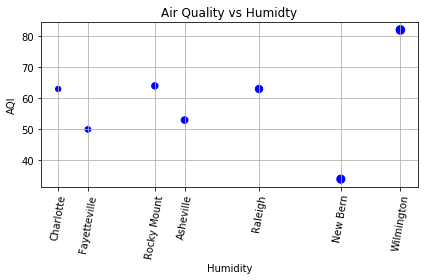

In [109]:
# Create the plot
plt.scatter(air_df["Humidity"], air_df["Air Quality"], marker = "o", color = "blue", s=air_df["Humidity"])

# Add Labels
plt.title("Air Quality vs Humidty")
plt.xlabel("Humidity")
plt.ylabel("AQI")
tick_locations = air_df["Humidity"]
plt.xticks(tick_locations, air_df["City"], rotation=80)
plt.grid()

# Save the plot
plt.tight_layout()
plt.savefig("Output/aqi_humidity.png")
plt.show()

### Air Quality, Temperature Relationship

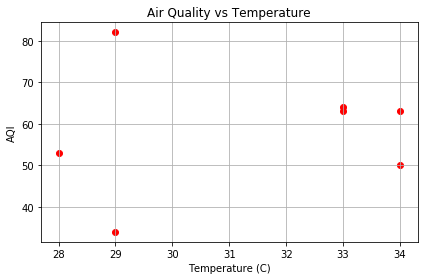

In [105]:
# Create plots for temprature and air quality 
plt.scatter(air_df["Temperature"], air_df["Air Quality"], marker="o", color = "red")
plt.xlabel("Temperature (C)")
plt.ylabel("AQI")
plt.title("Air Quality vs Temperature")
tick_locations = air_df["Temperature"]
plt.grid()
plt.tight_layout()
plt.savefig("Output/aqi_temp.png")

### Air Quality,  Air Pressure Relationship
